In [16]:
%matplotlib inline

import pickle

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import json
import data
import vocab
from vocab import VocabTagger
import packed_sequence_utils as packed_util
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

[0, 4, 5, 7, 8, 2, 2701, 4, 5, 7, 984, 10, 6, 505, 2, 2701, 4, 5, 12, 11, 6, 1, 9, 6, 599, 2, 2702, 4, 5, 12, 11, 6, 1, 10, 6, 52, 81, 2, 2702, 4, 5, 6, 179, 2, 2702, 4, 5, 12, 11, 6, 1, 10, 67, 57, 6, 145, 2, 2702, 4, 6, 8, 9, 6, 14, 82, 11, 6, 99, 2, 2702, 6, 8, 4, 63, 10, 6, 505, 9, 6, 13, 82, 11, 6, 99, 2, 2701, 4, 6, 8, 9, 13, 18, 11, 6, 129, 2, 2701, 4, 6, 8, 17, 67, 2, 2702, 4, 6, 8, 17, 46, 2, 2702, 4, 6, 8, 10, 6, 52, 136, 674, 2, 2702, 4, 6, 8, 63, 137, 6, 81, 11, 6, 92, 10, 67, 57, 6, 13, 2, 2701, 4, 6, 8, 1155, 12, 8, 11, 33, 92, 10, 67, 57, 6, 13, 2, 2702, 4, 6, 8, 63, 137, 6, 81, 11, 6, 92, 10, 46, 133, 6, 81, 137, 33, 92, 10, 67, 2, 2701, 4, 6, 8, 17, 19, 2, 2702, 4, 5, 6, 8, 17, 16, 2, 2702, 15, 1972, 4, 5, 7, 8, 10, 6, 505, 15, 6, 13, 11, 6, 129, 10, 6, 271, 28, 674, 2, 2701, 4, 5, 7, 8, 63, 10, 6, 505, 2, 2702, 4, 5, 7, 984, 2, 2701, 4, 6, 984, 9, 6, 14, 18, 11, 6, 129, 2, 2702, 4, 6, 984, 57, 165, 700, 2, 2702, 4, 6, 984, 10, 6, 505, 198, 6, 277, 11, 6, 129, 2, 2702,

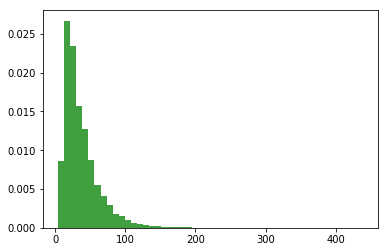

In [34]:
vocab_tagger = VocabTagger()
graph_data = []
with open(data.get_gw_file('train'), 'r') as f:
    i = 0
    for line in f:
        i += 1
        
        example = json.loads(line)

        dialogue_tokens = vocab_tagger.get_dialogue_tokens(example['qas'])w
        graph_data.append(len(dialogue_tokens))
        #print(len(dialogue_tokens))
        
n, bins, patches = plt.hist(graph_data, 50, normed=1, facecolor='green', alpha=0.75)

In [32]:
np.argmax(graph_data)

6817